# 2024 날씨 빅데이터 콘테스트 

## 전력 분야 - 기상에 따른 공동주택 전력수요 예측 개선 

In [52]:
import pandas as pd
import os 

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [53]:
df = pd.read_csv('./data/electric_train_cp949.csv', encoding='cp949', index_col=0)
df['electric_train.tm'] = pd.to_datetime(df['electric_train.tm'])

print(df.shape)

(7593355, 16)


In [54]:
elec_cols = ['electric_train.'+ a for a in ['tm', 'hh24', 'weekday', 'week_name', 'sum_qctr', 'n', 'sum_load', 'n_mean_load', 'elec']]
df_elec = df[elec_cols]
df_elec.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73


In [55]:
weat_cols = ['electric_train.'+ a for a in ['num', 'stn', 'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi']]
df_weat = df[weat_cols]
df_weat.head()

,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
1,4821,884,2.2,62.7,1.8,0.0,-1.0
2,4821,884,2.3,63.1,2.1,0.0,-0.6
3,4821,884,2.2,62.4,2.5,0.0,-1.3
4,4821,884,1.7,63.5,1.7,0.0,-0.2
5,4821,884,1.7,63.0,1.6,0.0,-0.8


In [56]:
reset_order_cols = elec_cols + weat_cols

df_new = df[reset_order_cols]

df_new.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56,4821,884,2.2,62.7,1.8,0.0,-1.0
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78,4821,884,2.3,63.1,2.1,0.0,-0.6
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17,4821,884,2.2,62.4,2.5,0.0,-1.3
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34,4821,884,1.7,63.5,1.7,0.0,-0.2
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73,4821,884,1.7,63.0,1.6,0.0,-0.8


In [57]:
df_new.isnull().sum()

electric_train.tm             0
electric_train.hh24           0
electric_train.weekday        0
electric_train.week_name      0
electric_train.sum_qctr       0
electric_train.n              0
electric_train.sum_load       0
electric_train.n_mean_load    0
electric_train.elec           0
electric_train.num            0
electric_train.stn            0
electric_train.nph_ta         0
electric_train.nph_hm         0
electric_train.nph_ws_10m     0
electric_train.nph_rn_60m     0
electric_train.nph_ta_chi     0
dtype: int64

In [58]:
df_new['year'] = df_new['electric_train.tm'].dt.year
df_new['month'] = df_new['electric_train.tm'].dt.month

In [59]:
df_new = df_new.sort_values(by='electric_train.tm')
df_new.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,year,month
2647991,2020-01-01 01:00:00,1,2,0,63850,39,9732.96,250.490543,99.63,13615,140,-8.5,74.5,0.9,0.0,-5.8,2020,1
5208382,2020-01-01 01:00:00,1,2,0,14750,20,2401.12,116.010234,103.49,18235,565,-8.8,25.6,1.9,0.0,-4.6,2020,1
5182078,2020-01-01 01:00:00,1,2,0,71630,32,12139.16,363.252769,104.43,18234,565,-8.8,25.6,1.9,0.0,-4.6,2020,1
5155774,2020-01-01 01:00:00,1,2,0,45840,28,6723.84,225.924357,106.29,18233,512,-6.3,31.3,2.5,0.0,-7.8,2020,1
1280137,2020-01-01 01:00:00,1,2,0,76450,44,12949.24,287.250770,102.45,11272,941,2.4,68.0,1.2,0.0,-5.3,2020,1


In [85]:
# 시즌을 결정하는 함수
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# 'season' 컬럼 추가
df_new['season'] = df_new['electric_train.tm'].dt.month.apply(get_season)

In [86]:
df_new.columns

Index(['electric_train.tm', 'year', 'month', 'electric_train.hh24',
       'electric_train.weekday', 'electric_train.week_name',
       'electric_train.sum_qctr', 'electric_train.n',
       'electric_train.sum_load', 'electric_train.n_mean_load',
       'electric_train.num', 'electric_train.stn', 'electric_train.nph_ta',
       'electric_train.nph_hm', 'electric_train.nph_ws_10m',
       'electric_train.nph_rn_60m', 'electric_train.nph_ta_chi',
       'electric_train.elec', 'season'],
      dtype='object')

In [87]:
new_col_order = ['electric_train.tm', 'year', 'season', 'month','electric_train.hh24', 'electric_train.weekday',
       'electric_train.week_name', 'electric_train.sum_qctr',
       'electric_train.n', 'electric_train.sum_load',
       'electric_train.n_mean_load',
       'electric_train.num', 'electric_train.stn', 'electric_train.nph_ta',
       'electric_train.nph_hm', 'electric_train.nph_ws_10m',
       'electric_train.nph_rn_60m', 'electric_train.nph_ta_chi', 'electric_train.elec']

In [88]:
df_new = df_new[new_col_order]

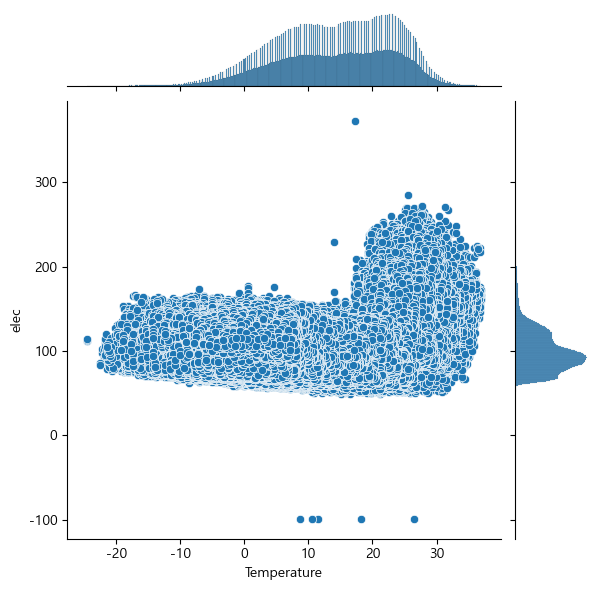

In [89]:
graph = sns.jointplot(x=df_new['electric_train.nph_ta'], y=df_new['electric_train.elec'], kind='scatter')
graph.set_axis_labels(xlabel='Temperature', ylabel='elec')
plt.show()

In [90]:
# aws 지점 번호
aws_spots = sorted(df_new['electric_train.stn'].unique().tolist())
aws_spots[:10]

[98, 99, 101, 104, 106, 108, 112, 114, 119, 127]

In [91]:
print(len(aws_spots))

185


### 지역을 먼저 나눠보자 

In [92]:
spots_num = sorted(df_new['electric_train.num'].unique().tolist())
df_1 = df_new[df_new['electric_train.num']==spots_num[1]]

In [93]:
no_2020 = []
yes_2020 = []
for i in range(len(spots_num)):
    a = str(df_new[df_new['electric_train.num']==spots_num[i]]['electric_train.tm'].min())
    b = str(df_1['electric_train.tm'].min())

    if a != b:
        no_2020.append(spots_num[i])
    else:
        yes_2020.append(spots_num[i])
        
print(len(no_2020))  # 2020년도 데이터가 없는 격자 지역 개수 
print(len(yes_2020)) # 2020년도 데이터가 있는 격자 지역 개수 

23
300


In [94]:
print(no_2020)

[4821, 8994, 9609, 10224, 10975, 10976, 11119, 11271, 11376, 11562, 12322, 12467, 12618, 12619, 13202, 13360, 13648, 14258, 14378, 15849, 16900, 16913, 18828]


In [95]:
yes_2020[0]

5565

In [96]:
df_0 = df_new[df_new['electric_train.num']==yes_2020[0]]

df_0

,electric_train.tm,year,season,month,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.elec
8761,2020-01-01 01:00:00,2020,Winter,1,1,2,0,42250,58,4468.72,79.776051,5565,184,2.3,65.8,1.7,0.0,-0.3,96.58
8762,2020-01-01 02:00:00,2020,Winter,1,2,2,0,42250,58,4101.00,79.776051,5565,184,2.5,69.7,1.8,0.0,-0.2,88.63
8763,2020-01-01 03:00:00,2020,Winter,1,3,2,0,42250,58,3724.60,79.776051,5565,184,2.8,69.5,2.3,0.0,-0.2,80.50
8764,2020-01-01 04:00:00,2020,Winter,1,4,2,0,42250,58,3484.40,79.776051,5565,184,2.8,66.0,1.6,0.0,0.5,75.31
8765,2020-01-01 05:00:00,2020,Winter,1,5,2,0,42250,58,3409.12,79.776051,5565,184,3.0,66.1,1.6,0.0,0.5,73.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35060,2022-12-31 20:00:00,2022,Winter,12,20,5,1,25550,32,3405.12,94.107824,5565,184,6.6,57.3,2.3,0.0,4.9,113.07
35061,2022-12-31 21:00:00,2022,Winter,12,21,5,1,25550,32,3462.64,94.107824,5565,184,6.3,59.9,2.1,0.0,4.8,114.98
35062,2022-12-31 22:00:00,2022,Winter,12,22,5,1,25550,32,3412.04,94.107824,5565,184,5.4,62.9,2.1,0.0,3.7,113.30
35063,2022-12-31 23:00:00,2022,Winter,12,23,5,1,25550,32,3225.40,94.107824,5565,184,4.5,67.1,2.0,0.0,2.8,107.10


In [97]:
# 격자넘버 5565 -> 2020, 2021, 2022
df_0_0am_day = df_0[(df_0['electric_train.tm'].dt.month == 1) & (df_0['electric_train.tm'].dt.day == 1) & (df_0['electric_train.tm'].dt.hour == 1)]

df_0_0am_day.head()

,electric_train.tm,year,season,month,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.elec
8761,2020-01-01 01:00:00,2020,Winter,1,1,2,0,42250,58,4468.72,79.776051,5565,184,2.3,65.8,1.7,0.0,-0.3,96.58
17545,2021-01-01 01:00:00,2021,Winter,1,1,4,0,36690,49,3821.20,81.052601,5565,184,4.2,58.5,5.2,0.0,-0.2,96.21
26305,2022-01-01 01:00:00,2022,Winter,1,1,5,1,25550,32,2777.60,94.107824,5565,184,3.2,66.7,1.8,0.0,0.6,92.23


In [98]:
title_font = {
    'fontsize': 25
}

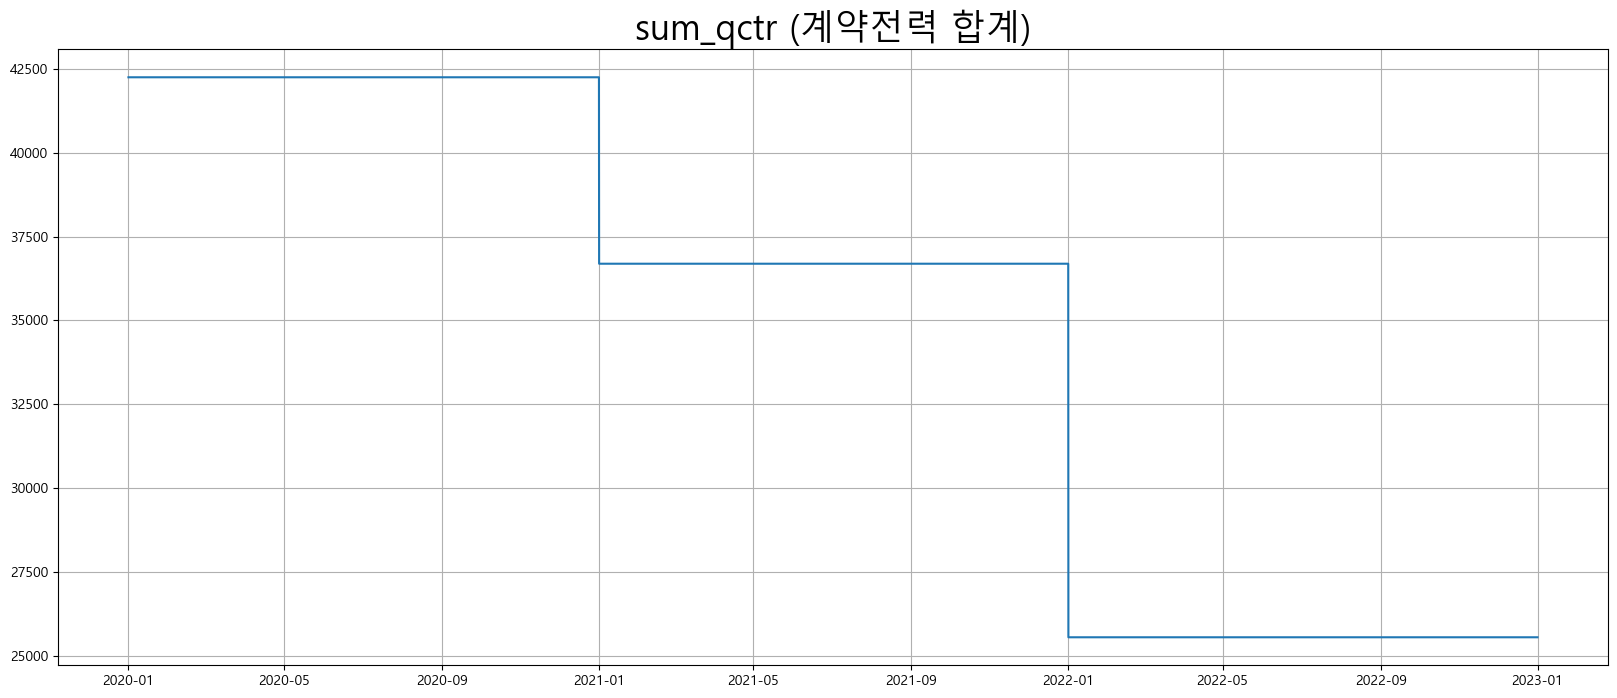

In [99]:
# 격자넘버 5565의 계약전력 합계는 매년 줄어들고 있다.
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.sum_qctr', data = df_0)
plt.title('sum_qctr (계약전력 합계)',fontdict=title_font)
plt.grid()

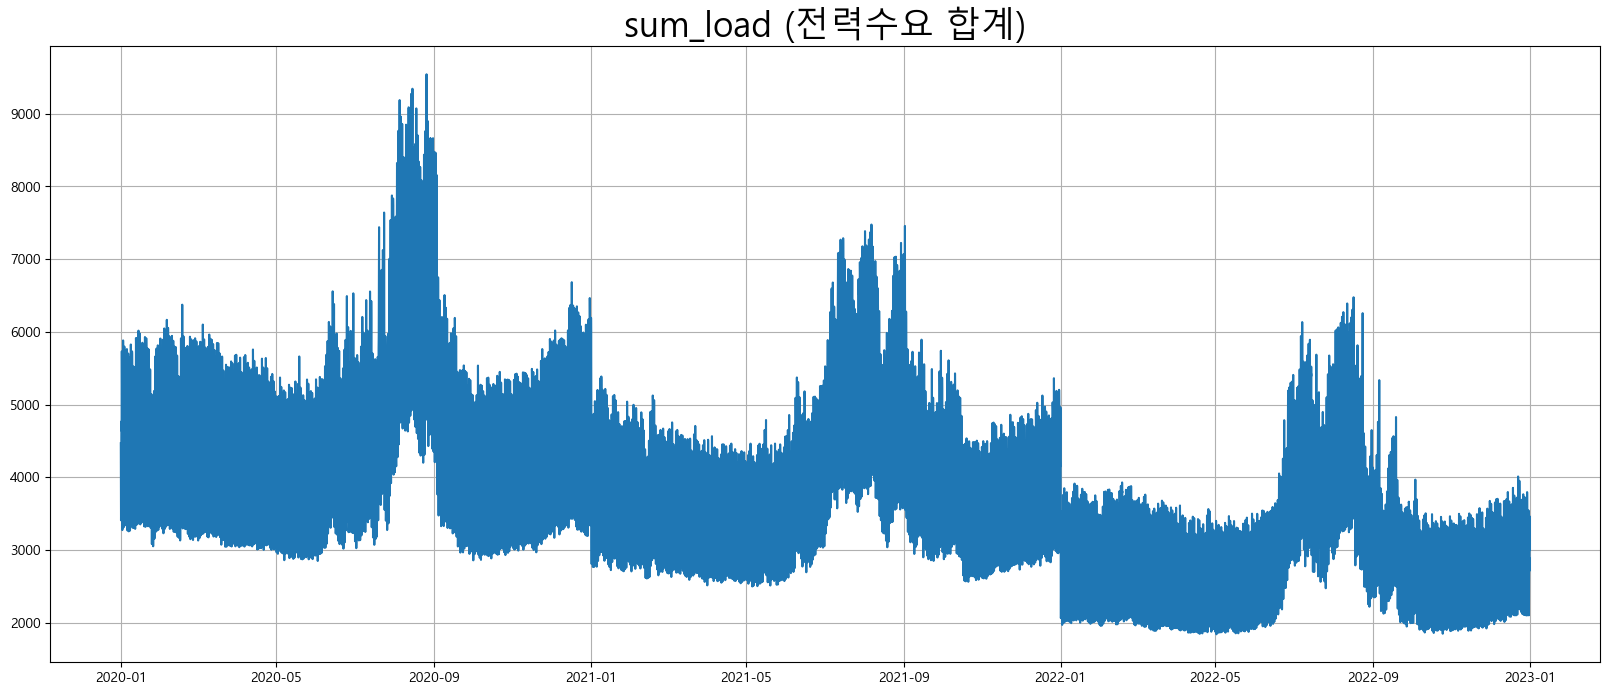

In [100]:
# 전력수요 합계도 계절성을 띄어 달라지지만 연도별로 봤을때 줄어들고 있다.
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.sum_load', data = df_0)
plt.title('sum_load (전력수요 합계)',fontdict=title_font)
plt.grid()

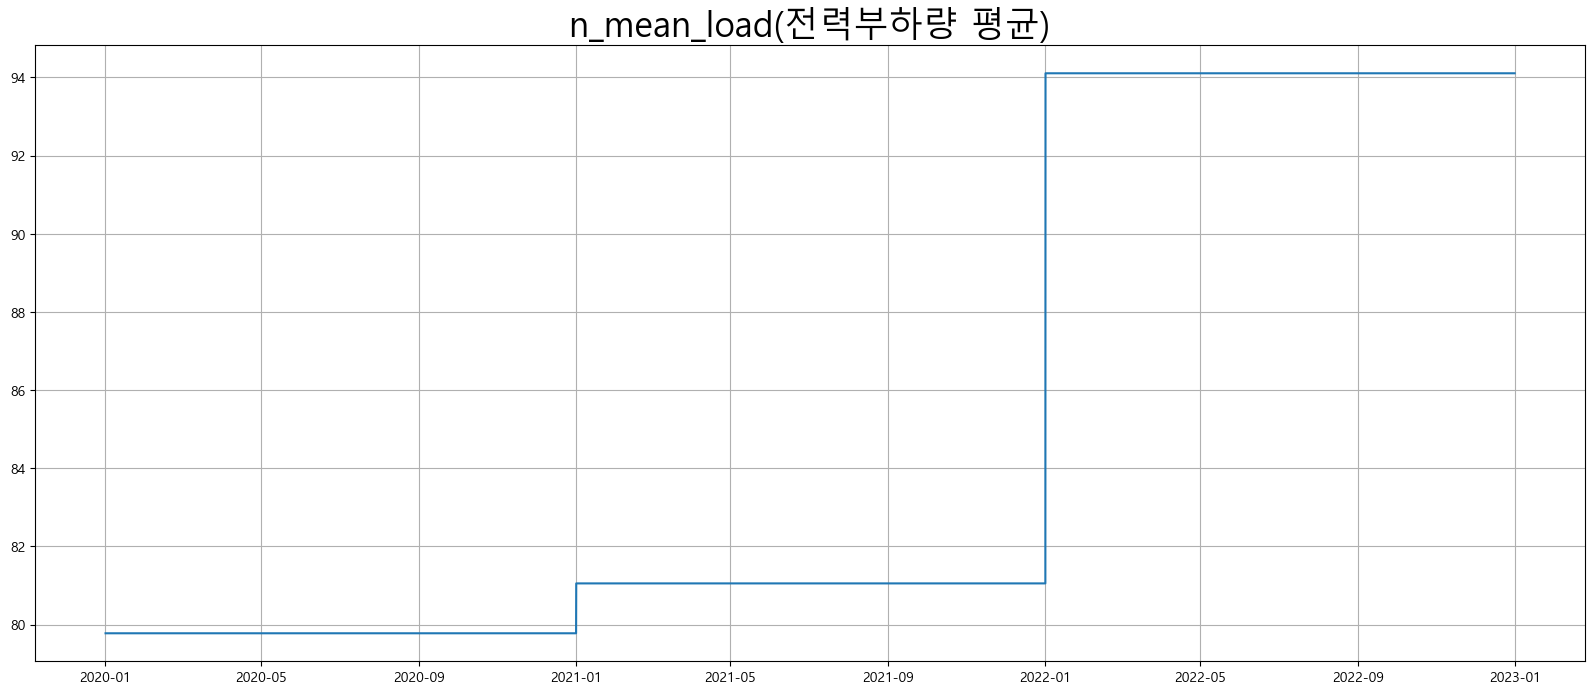

In [101]:
# 전력부하량 평균이 증가하고 있다.
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.n_mean_load', data = df_0)
plt.title('n_mean_load(전력부하량 평균)',fontdict=title_font)
plt.grid()

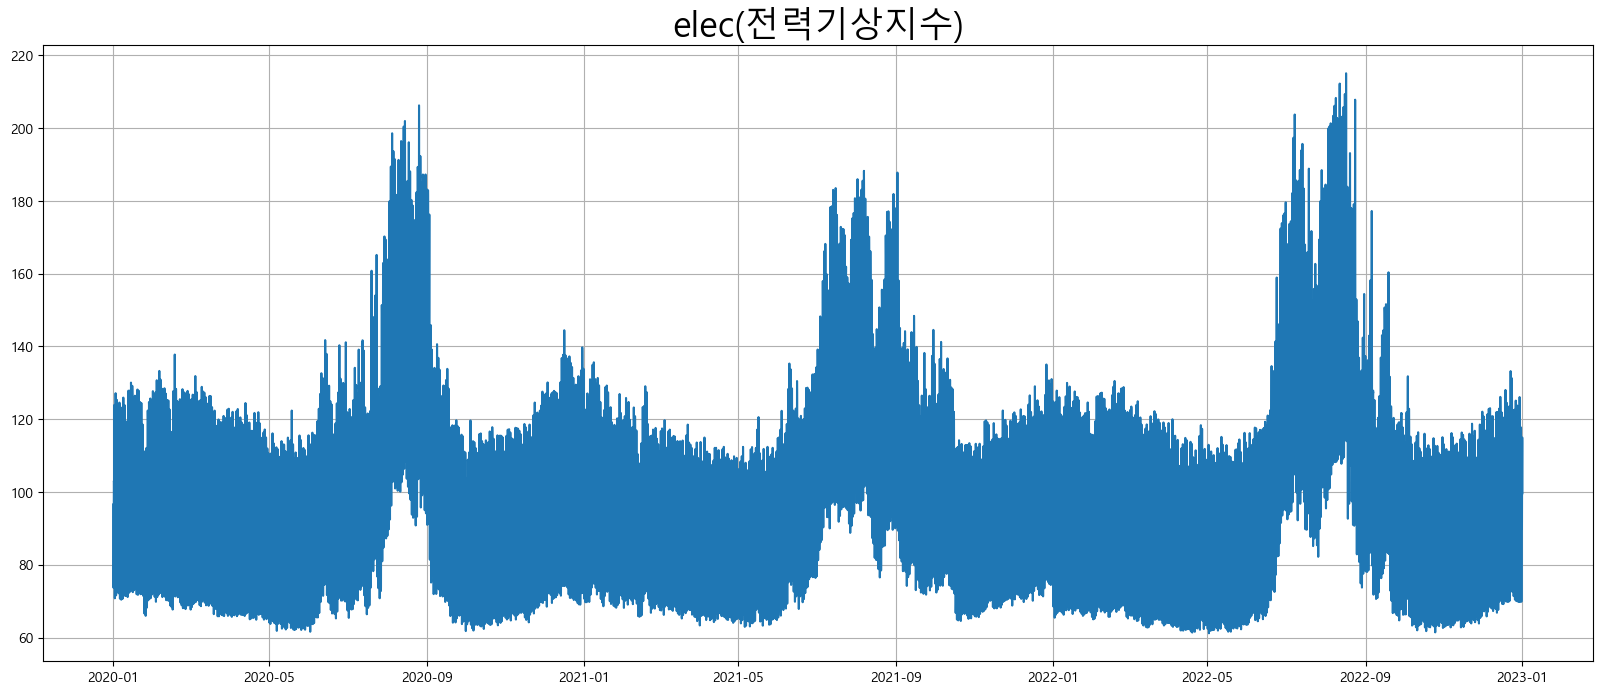

In [102]:

plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.elec', data = df_0)
plt.title('elec(전력기상지수)',fontdict=title_font)
plt.grid()

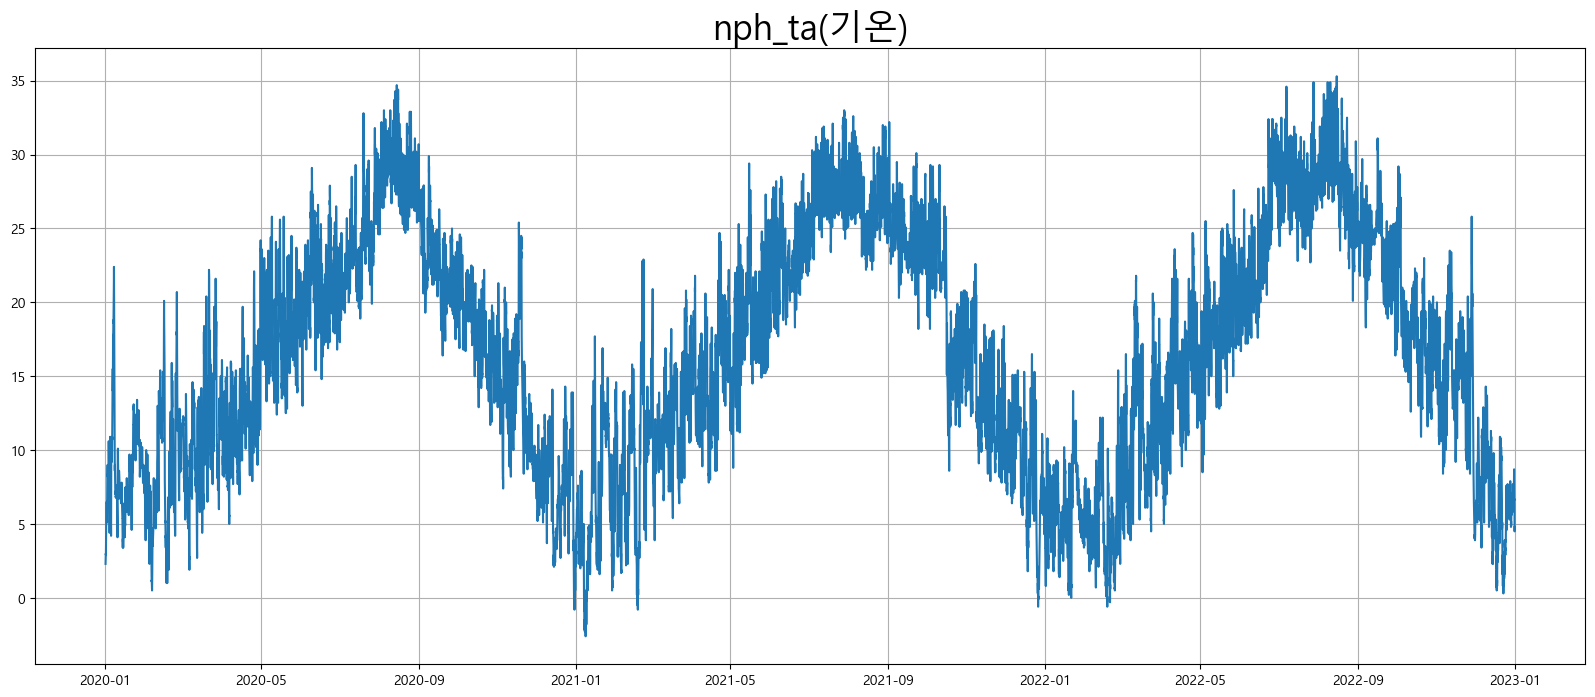

In [103]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.nph_ta', data = df_0)
plt.title('nph_ta(기온)',fontdict=title_font)
plt.grid()

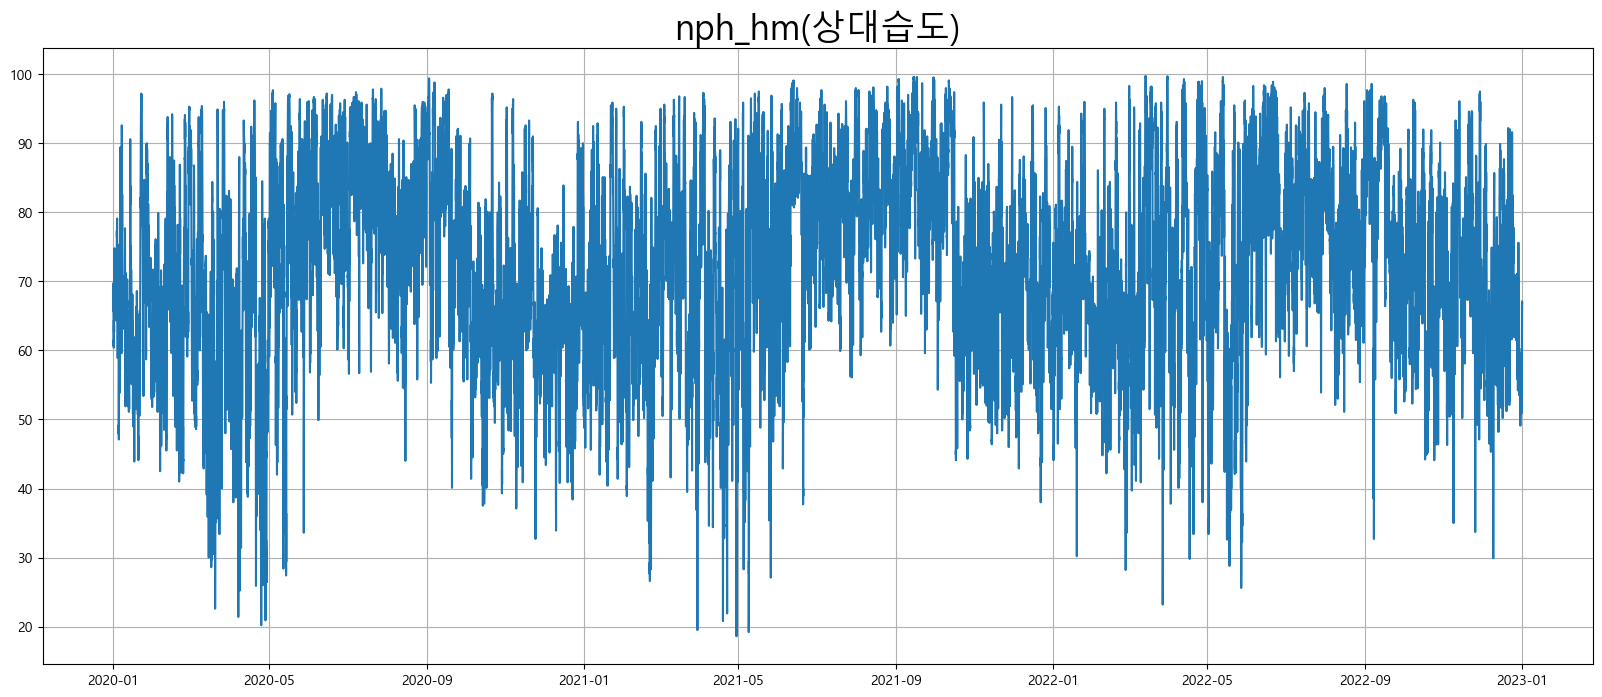

In [104]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.nph_hm', data = df_0)
plt.title('nph_hm(상대습도)',fontdict=title_font)
plt.grid()

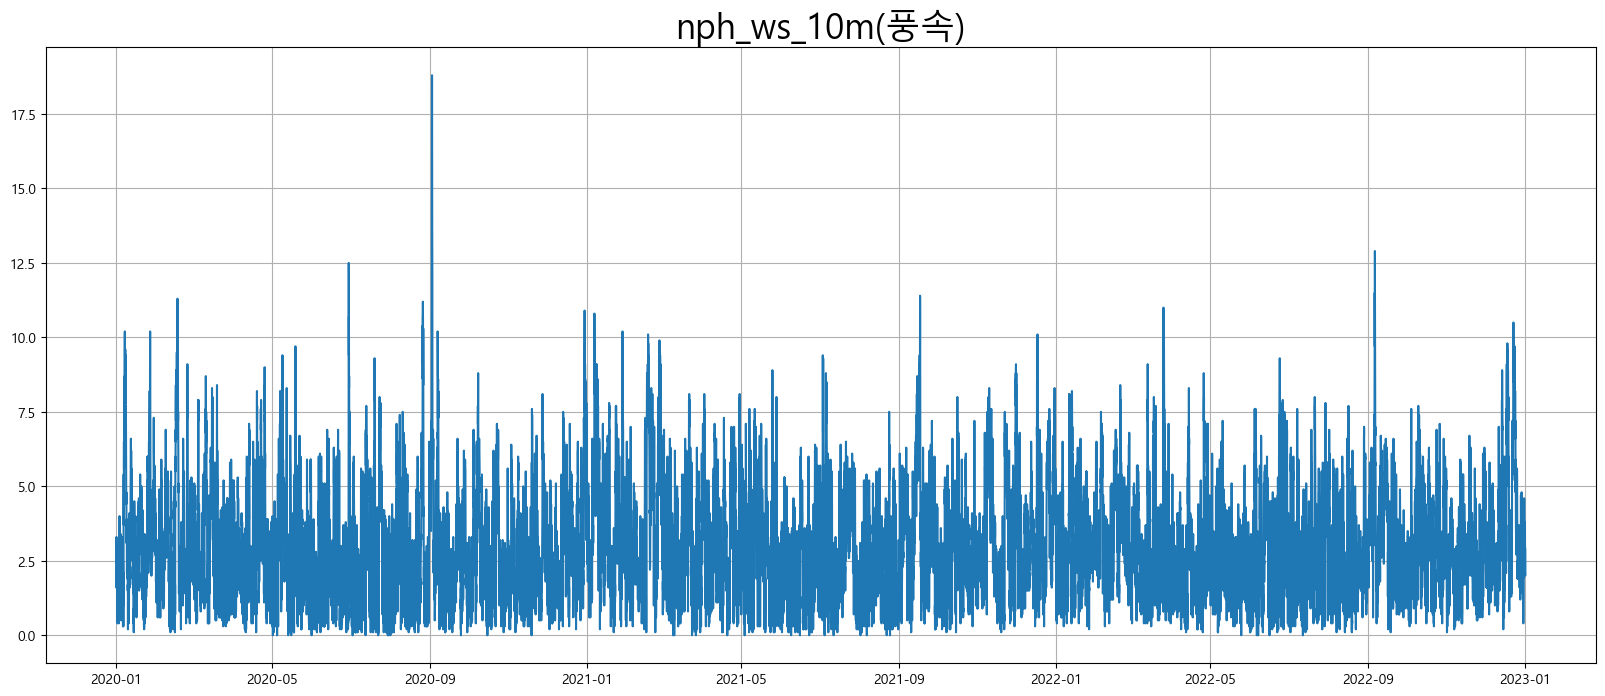

In [105]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.nph_ws_10m', data = df_0)
plt.title('nph_ws_10m(풍속)',fontdict=title_font)
plt.grid()

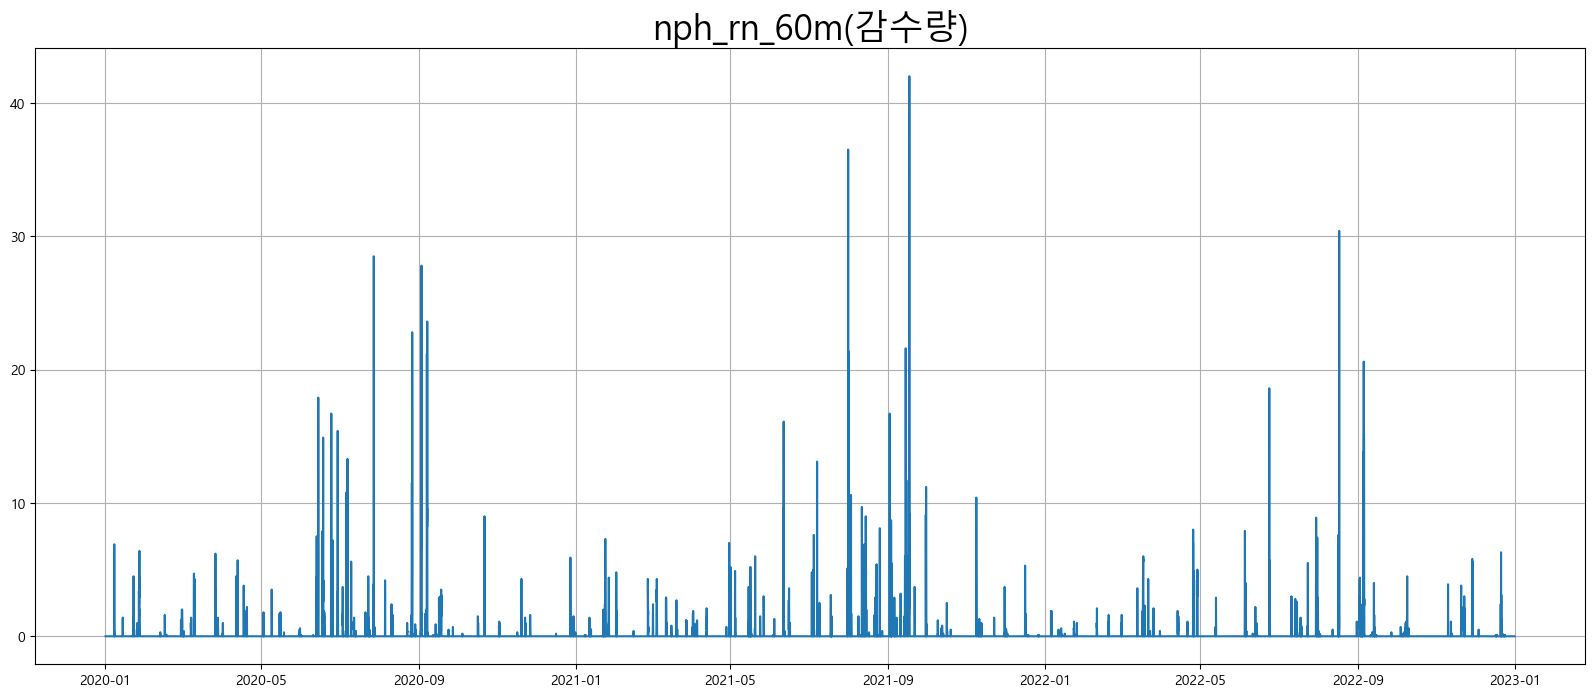

In [106]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.nph_rn_60m', data = df_0)
plt.title('nph_rn_60m(감수량)',fontdict=title_font)
plt.grid()

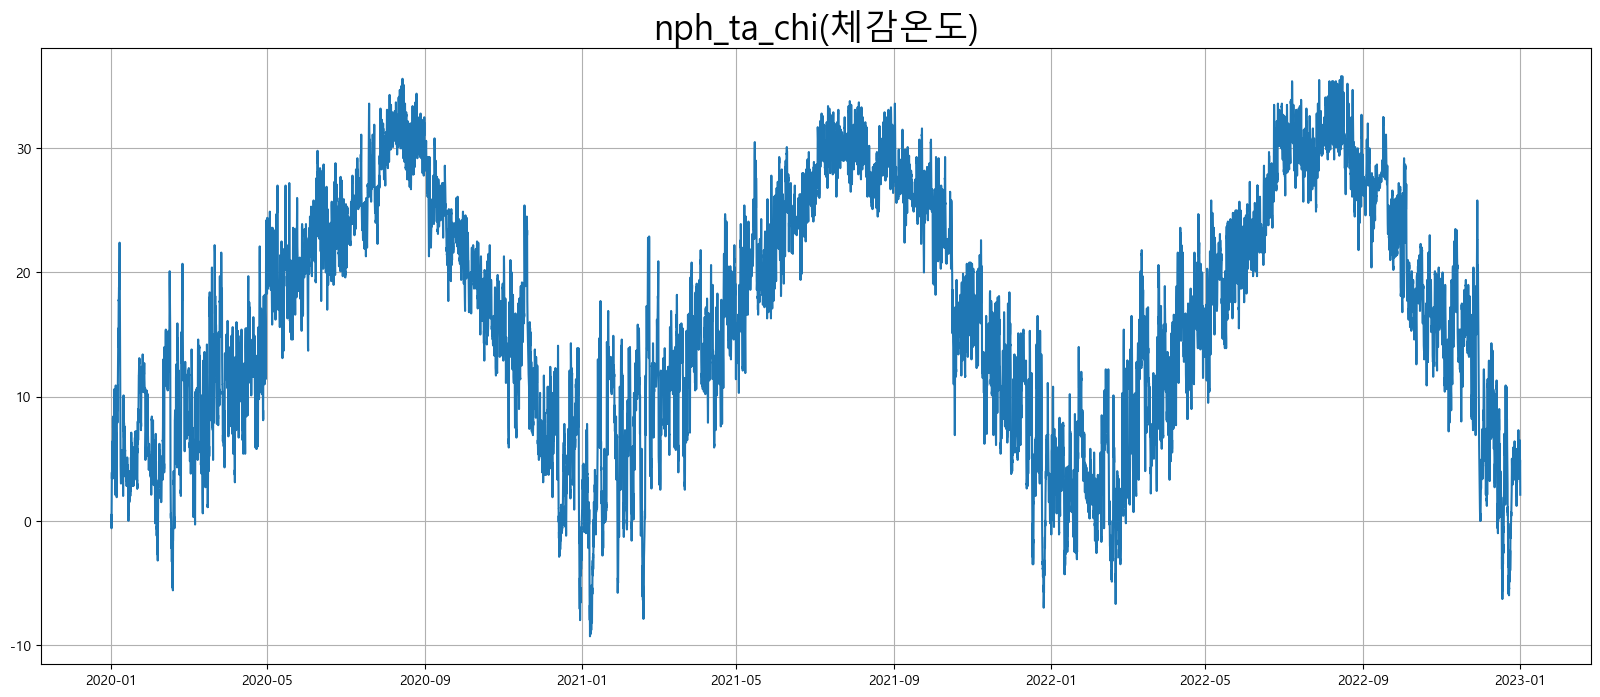

In [107]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.nph_ta_chi', data = df_0)
plt.title('nph_ta_chi(체감온도)',fontdict=title_font)
plt.grid()

### 주중 주말 과 elec의 관계 

주중과 주말의 elec관계를 그래프로 그려본다.

월별 주중과 주말의 elec관계

요일별 elec관계를 그래프로 그려본다. 


Text(0.5, 1.0, '주중0, 주말1, 주중과주말간의 elec관계')

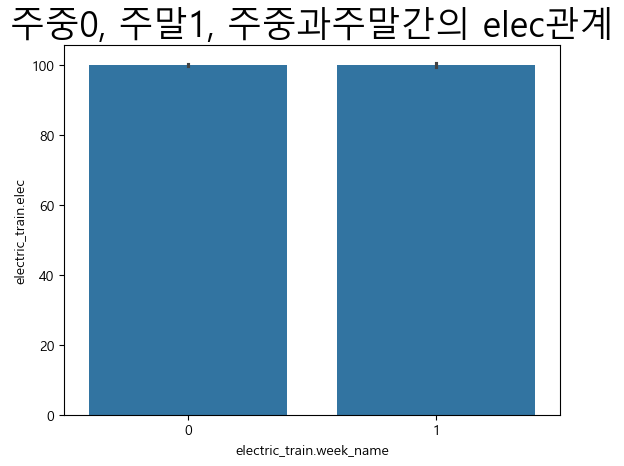

In [108]:
sns.barplot(x = 'electric_train.week_name', y = 'electric_train.elec', data = df_0)
plt.title('주중0, 주말1, 주중과주말간의 elec관계',fontdict=title_font)

Text(0.5, 1.0, '월~일요일, 요일간의 elec관계')

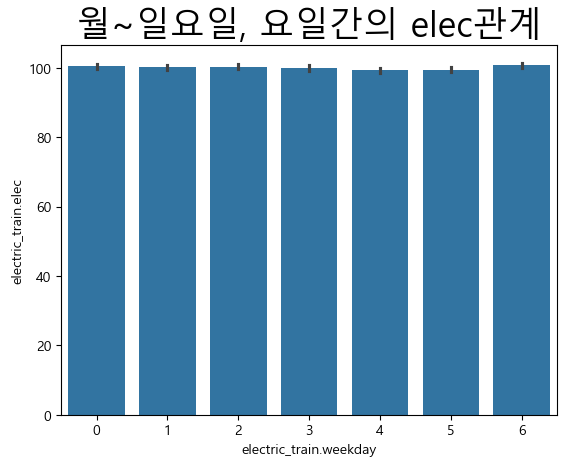

In [109]:
sns.barplot(x = 'electric_train.weekday', y = 'electric_train.elec', data = df_0)
plt.title('월~일요일, 요일간의 elec관계',fontdict=title_font)

Text(0.5, 1.0, '1~24시, 시간간의 elec관계')

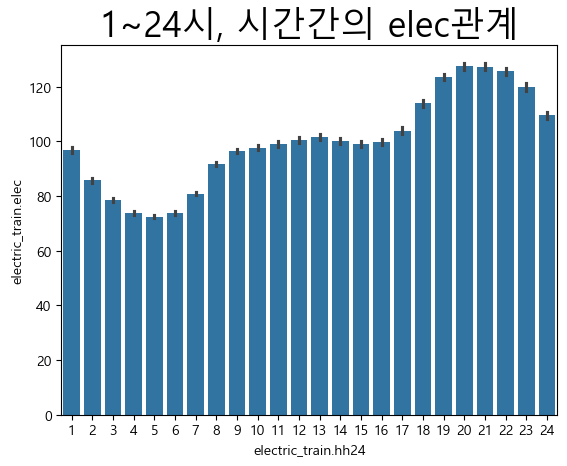

In [110]:
sns.barplot(x = 'electric_train.hh24', y = 'electric_train.elec', data = df_0)
plt.title('1~24시, 시간간의 elec관계',fontdict=title_font)

Text(0.5, 1.0, '계절별 elec관계')

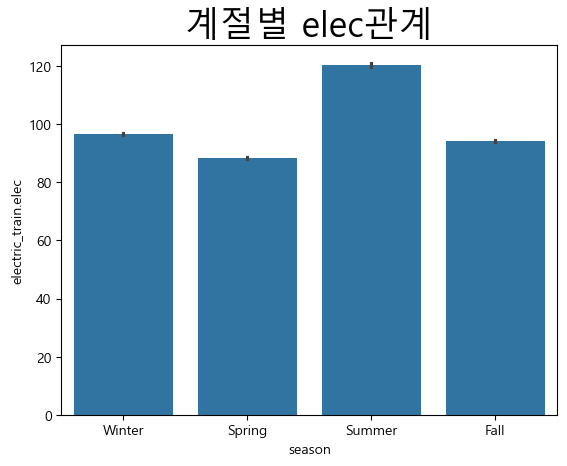

In [112]:
sns.barplot(x = 'season', y = 'electric_train.elec', data = df_0)
plt.title('계절별 elec관계',fontdict=title_font)

In [115]:
df_0['season'].unique()[0]

'Winter'

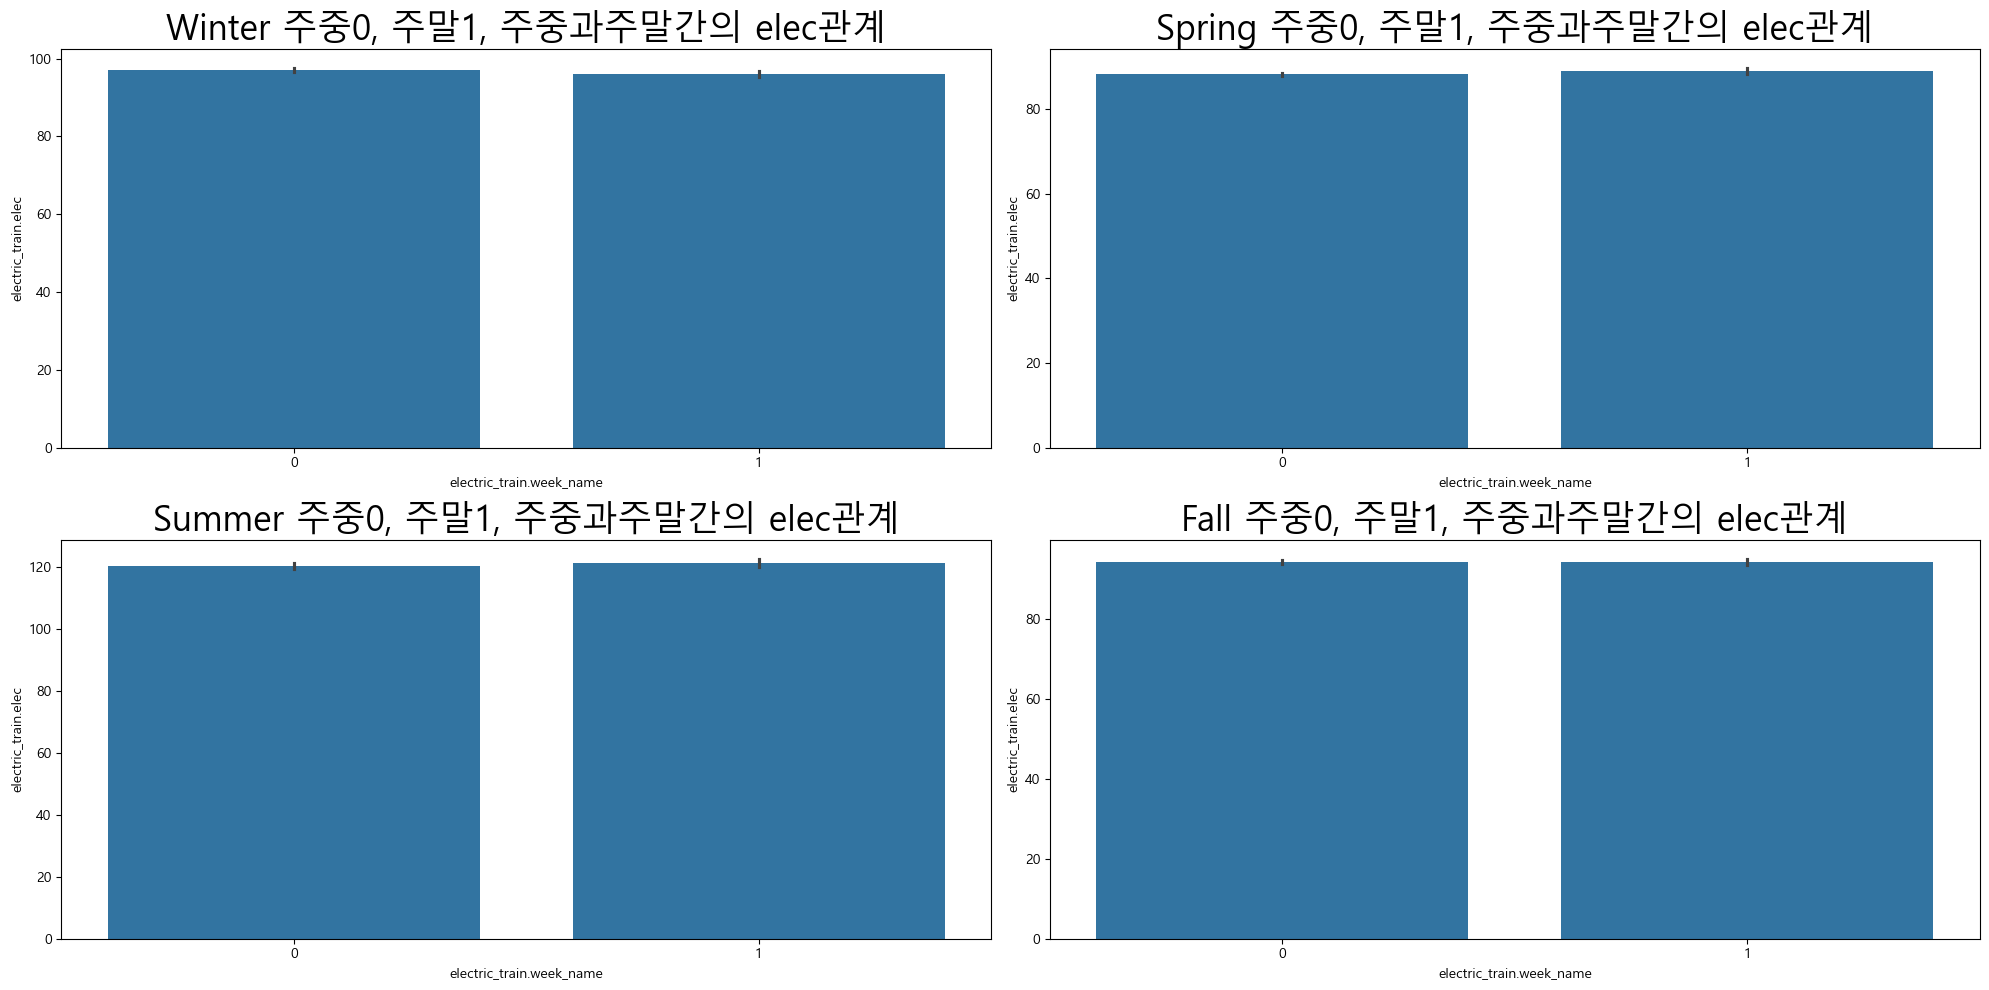

In [122]:
plt.figure(figsize = (20,10))
for i in range(len(df_0['season'].unique())):
    plt.subplot(2,2,1+i)
    season = df_0['season'].unique()[i]
    sns.barplot(x = 'electric_train.week_name', y = 'electric_train.elec', data = df_0[df_0['season']==season])
    plt.title(f'{season} 주중0, 주말1, 주중과주말간의 elec관계',fontdict=title_font)

plt.tight_layout()
plt.show()

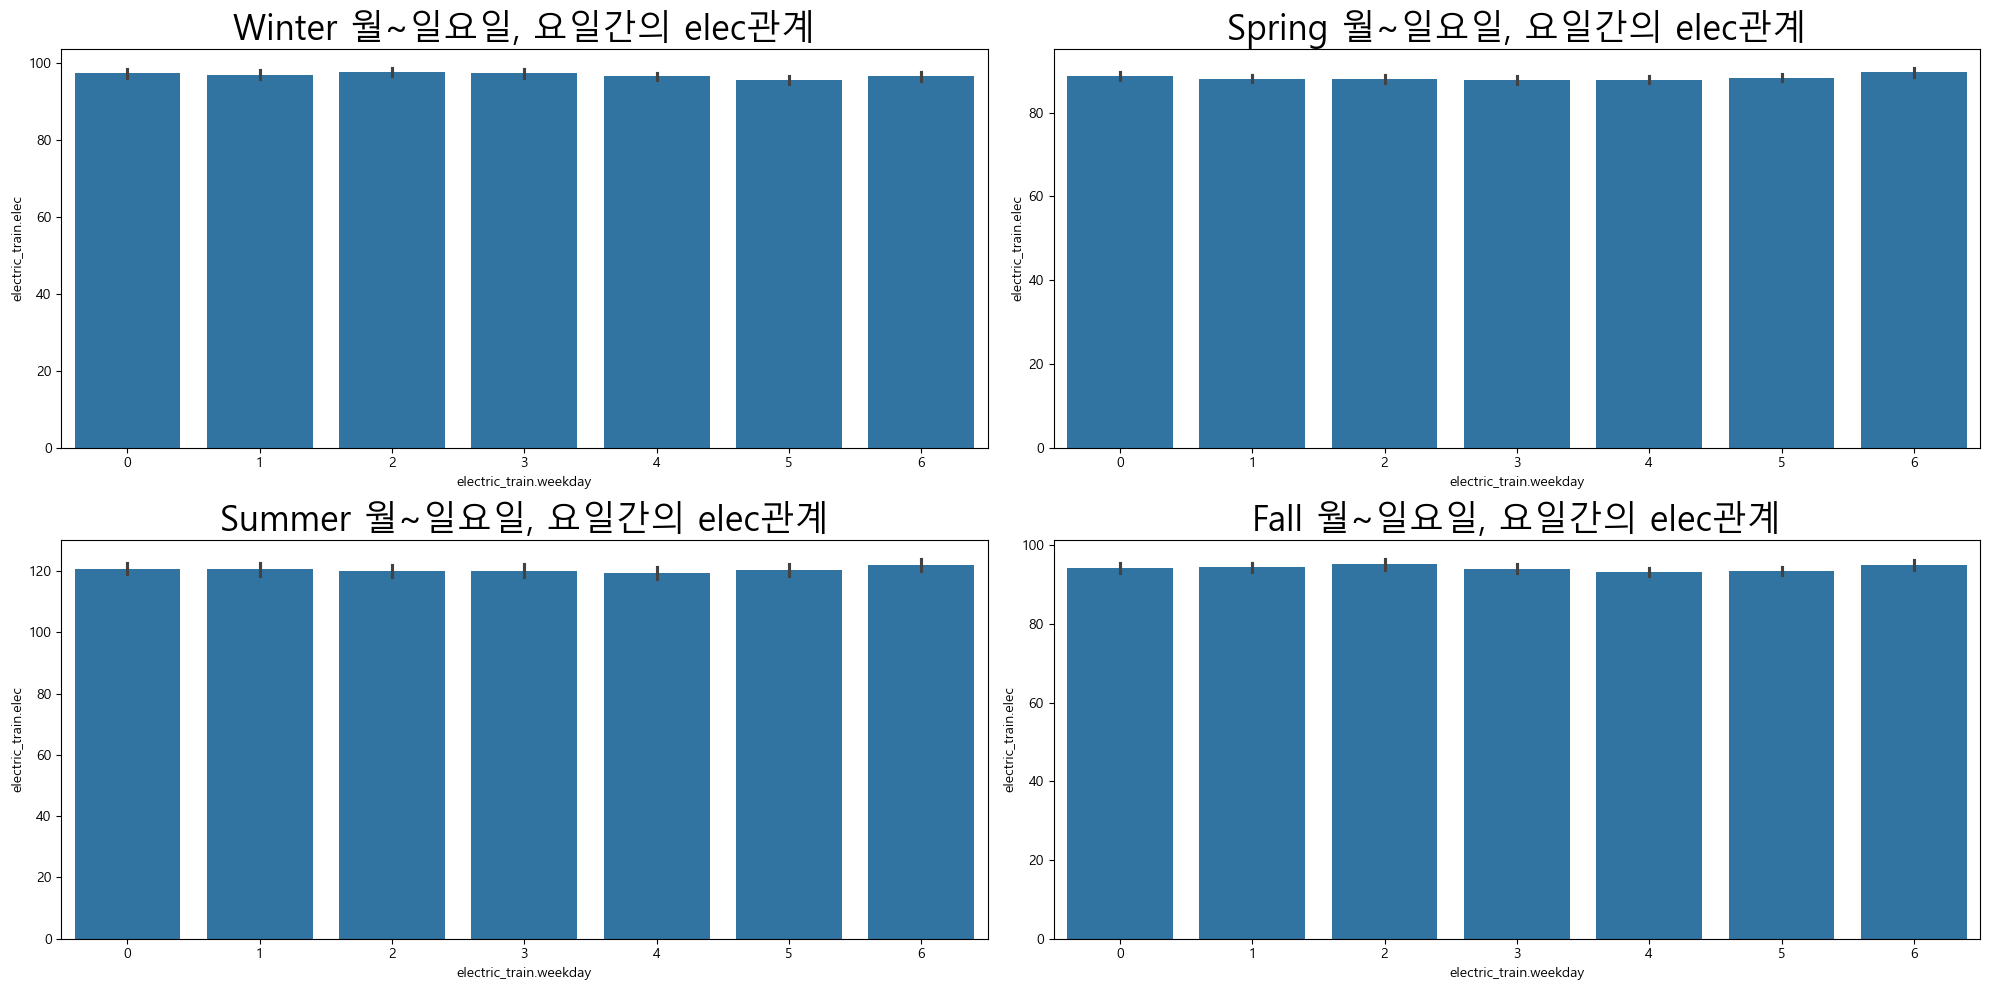

In [121]:
plt.figure(figsize = (20,10))
for i in range(len(df_0['season'].unique())):
    plt.subplot(2,2,1+i)
    season = df_0['season'].unique()[i]
    
    sns.barplot(x = 'electric_train.weekday', y = 'electric_train.elec', data = df_0[df_0['season']==season])
    plt.title(f'{season} 월~일요일, 요일간의 elec관계',fontdict=title_font)
    
plt.tight_layout()
plt.show()

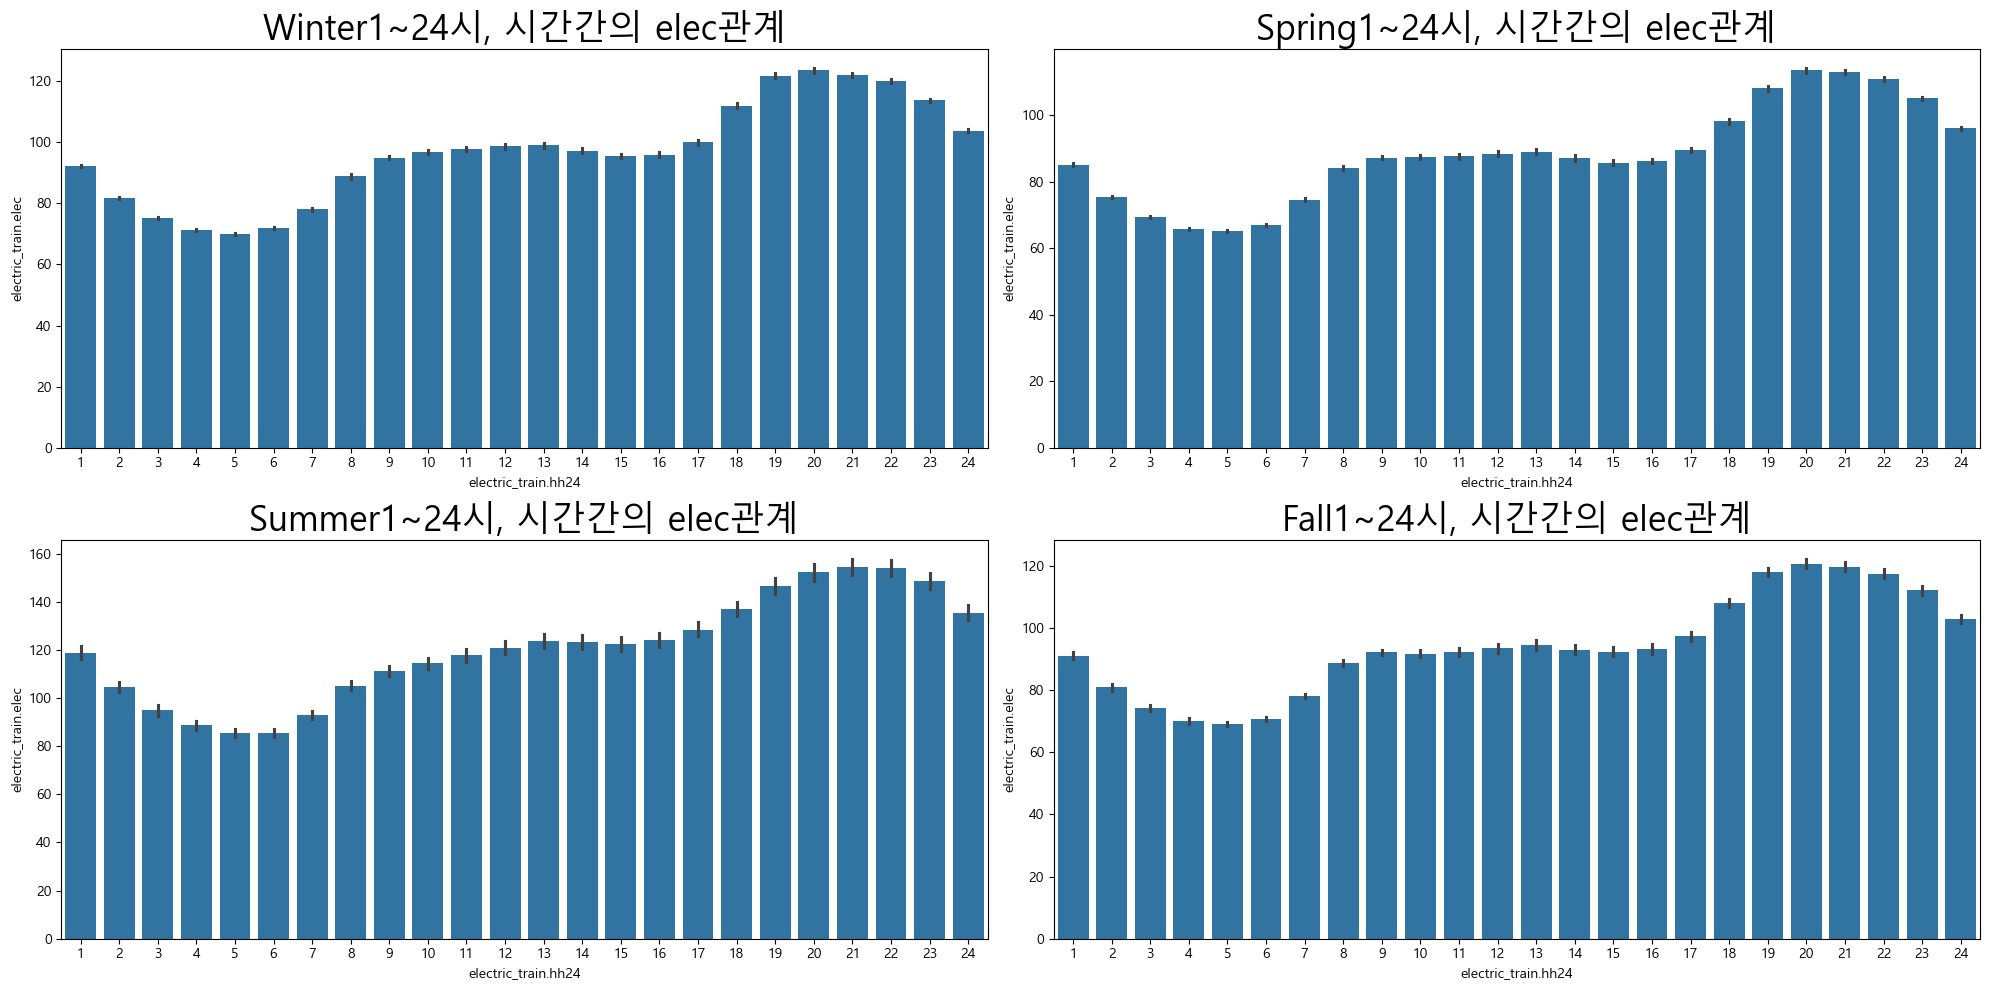

In [120]:
plt.figure(figsize = (20,10))
for i in range(len(df_0['season'].unique())):
    plt.subplot(2,2,1+i)
    season = df_0['season'].unique()[i]
    
    sns.barplot(x = 'electric_train.hh24', y = 'electric_train.elec', data = df_0[df_0['season']==season])
    plt.title(f'{season}1~24시, 시간간의 elec관계',fontdict=title_font)

plt.tight_layout()
plt.show()